In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
d575_1667: DISTANCE ATOMS=575,1667
d327_1664: DISTANCE ATOMS=327,1664
d1328_1666: DISTANCE ATOMS=1328,1666
d960_1667: DISTANCE ATOMS=960,1667
d134_1666: DISTANCE ATOMS=134,1666
d1238_1664: DISTANCE ATOMS=1238,1664
d1321_1667: DISTANCE ATOMS=1321,1667
d1631_1666: DISTANCE ATOMS=1631,1666

group_TRP: COM ATOMS=919,921,923,926,927,929,931-933,935,937,939,941,942
group_BUT: COM ATOMS=1664-1669
com_D: DISTANCE ATOMS=group_TRP,group_BUT

COMBINE ...
LABEL=rc ARG=d575_1667,d327_1664,d1328_1666,d960_1667,d134_1666,d1238_1664,d1321_1667,d1631_1666 COEFFICIENTS=-1.052,-0.932,-0.976,-1.028,-1.053,-0.915,1.081,1.023 PERIODIC=NO
... COMBINE

METAD BIASFACTOR=15 TEMP=300 ARG=rc SIGMA=0.45 HEIGHT=1.5 PACE=500 LABEL=metad

PRINT ARG=com_D,rc,metad.bias STRIDE=1 FILE=BIASED_COLVAR

SyntaxError: invalid syntax (<ipython-input-13-77ff97b90528>, line 1)

In [58]:
file = open("unbiased/su1")
rc = [-1.052,-0.932,-0.976,-1.028,-1.053,-0.915,1.081,1.023]
rc_traj = {}
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj[time] = -1.0 * rc_val
file.close()

file = open("unbiased/su2")
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj[time] = -1.0 * rc_val
file.close()

file = open("unbiased/su3")
for line in file:
    vals = line.split()[2:]
    temp = [float(i) for i in vals]
    time = int(float(line.split()[0]))
    rc_val = np.dot(rc, temp)
    rc_traj[time] = -1.0 * rc_val
file.close()

rcs = []
for i in range(500001):
    rcs.append(rc_traj[i])

500001


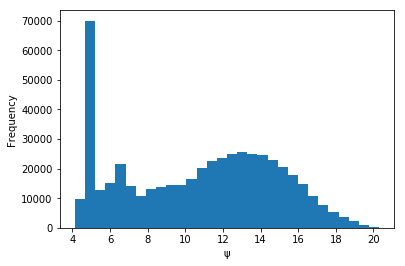

In [125]:
print(len(rcs))
plt.hist(rcs, bins=30)
plt.xlabel("\u03C8")
plt.ylabel("Frequency")
plt.show()

In [109]:
m1 = np.min(rcs)
m2 = np.max(rcs)
diff = (m2 - m1) / 30
cutoff = m1 + 3.0 * diff
print(cutoff)
bound = 0.0
unbound = 0.0
count = 0.0
diff = []
for i in range(500):
    for j in range(1000):
        if rcs[i*1000 + j] <= cutoff:
            bound = bound + 1.0
        else:
            unbound = unbound + 1.0
        count = count + 1.0
    bound_g = -2.5 * np.log(bound / count)
    unbound_g = -2.5 * np.log(unbound / count)
    diff.append(unbound_g - bound_g)
# plot in kJ

5.748455257700001


In [87]:
weight = np.load("data/weights.npy")

499999.998000 -6.242296



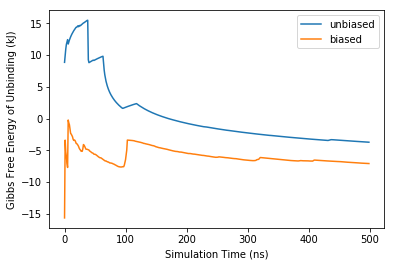

'500000.000000 -6.242237'

In [122]:
file = open("data/FULL_BIASED")
counter = 0
bound = 0.0
unbound = 0.0
sum_weights = 0.0
bias_rcs = []
bias_diff = []
for i in range(500):
    for j in range(500000):
        line = file.readline()
        rc = -1.0 * float(line.split()[1])
        bias_rcs.append(rc)
        if rc <= cutoff:
            bound = bound + weight[counter]
            sum_weights = sum_weights + weight[counter]
        else:
            unbound = unbound + weight[counter]
            sum_weights = sum_weights + weight[counter]
        counter = counter + 1
    bound_g = -2.5 * np.log(bound / sum_weights)
    unbound_g = -2.5 * np.log(unbound / sum_weights)
    bias_diff.append(unbound_g - bound_g)
print(line)
file.close()
plt.plot(diff, label="unbiased")
plt.plot(bias_diff, label="biased")
plt.xlabel("Simulation Time (ns)")
plt.ylabel("Gibbs Free Energy of Unbinding (kJ)")
plt.legend()
plt.show()
"500000.000000 -6.242237"